# Streamlit

**Streamlit** is an open-source Python framework that can be used to create interactive data applications in just a few lines of code. It's designed specifically for those who may not be web developers but need a tool that's easy to learn and use. It's mainly used by data scientists and AI/ML engineers.

Streamlit is a great tool to deploy models easily and quickly, without needing any knowledge of web development. It's a great tool to build attractive user interfaces in no time and that's what we'll be using to deploy our app online.

But before reaching deployment, we need to learn a bit about Streamlit. Later we will need to re-write our app for Streamlit. After what, we will work on deploying the app. We will sometimes use the following cheatsheet to quickly find Streamlit commands we need: https://cheat-sheet.streamlit.app/

> **From now on, we will not execute the code in the Jupyter notebook, this is because of two reasons:**
> 1. We are going to ask our agents to write code and execute it for us. Executing code by an agent inside a Jupyter notebook can be tricky and requires additional configuration. It also depends of the OS being used. To avoid dealing with these issues, we will simply move on to executing scripts instead of notebooks
> 2. We are going to start preparing our code to be able to deploy it on the cloud later, so that we can share a link towards our Agents based app. It is not possible to deploy notebooks, so we are going to start using scripts to get ready for that.
> We are still going to use notebooks to describe and explain our code, but do not execute the code here, instead use the script version of this code.

> In addition, we cannot run Streamlit apps from Jupyter notebooks...

In [ ]:
from autogen import ConversableAgent

from openai import OpenAI

import os
from dotenv import load_dotenv

# Load environment variables from .env
load_dotenv()

# Get the API key
api_key = os.getenv("OPENAI_API_KEY")



# We'll always have to start by creating a llm_config object to configure our agents
llm_config = {
    "model": "gpt-4o", 
    "api_key": "api_key"
    }

## Install streamlit

Installing streamlit is extremely easy sinec it's a Python package. Simply open a terminal and load your virtual environment as we previously did several times. Then enter:

`pip install streamlit`

And that's it!

## Streamlit stand-up comedy

Next, we are going to re-write out Two stand-up comedian example for Streamlit. In that app, we had to simple LLM agents that exchanged jokes for a few turns. Since it's simple, we'll rely on that  example to write our fist Streamlit app.

### Original code

This is the complete app we'll re-write:

```python
llm_config = {
    "model": "gpt-3.5-turbo", 
    "api_key": "sk-proj-GjIUEqAKI2j04dlC18rZT3BlbkFJnLTC5AeosFLwmSAxKzNU"
    }

from autogen import ConversableAgent

jack = ConversableAgent(
    "Jack",
    llm_config=llama,
    system_message="Your name is Jack and you are a stand-up comedian in a two-person comedy show.",
)
rose = ConversableAgent(
    "Rose",
    llm_config=llama,
    system_message="Your name is Rose and you are a stand-up comedian in a two-person comedy show.",
)

chat_result = jack.initiate_chat(rose, message="Rose, tell me a joke.", max_turns=2)
```

### Streamlit app goal

We are going to re-write it so that instead of using it from the terminal or a notebook, we will be able to execute as use it from the browser. Our app will be simple and it will look like this:

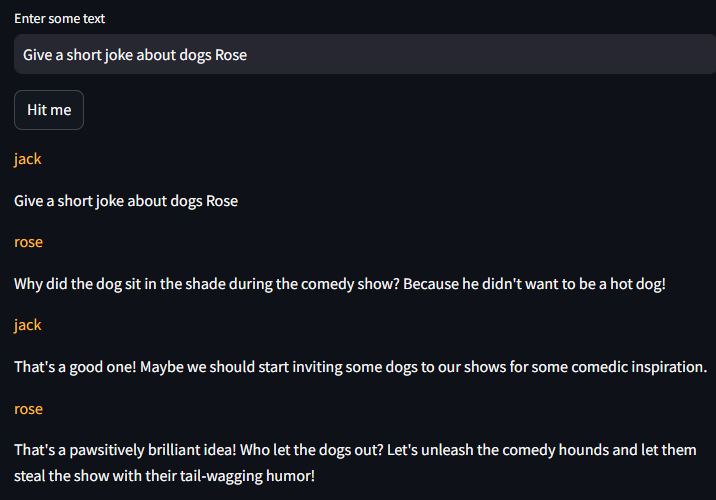

## Streamlit app writing

Let's get started with the modifications necessary to turn our code into a streamlit app.

The first thing we will need to do is import the streamlit module:

In [ ]:
import streamlit as st

Next, we are going to be able to add all the code that does not require input from the code or trigger any event, all the imports and definitions for example:

In [1]:
from autogen import ConversableAgent

jack = ConversableAgent(
    "Jack",
    llm_config=llm_config,
    system_message="Your name is Jack and you are a stand-up comedian in a two-person comedy show.",
)
rose = ConversableAgent(
    "Rose",
    llm_config=llm_config,
    system_message="Your name is Rose and you are a stand-up comedian in a two-person comedy show.",
)

Now the next step is to initiate the chat:

```python
        chat_result = jack.initiate_chat(
            rose, 
            message="Rose, tell me a joke.", 
            max_turns=2
            )
```

The chat initiation will take a message as an input. In our previous code, the message was "Rose, tell me a joke.". For our streamlit app, we want to allow the user to change this message. So we must now add a streamlit textbox and a button to allow the user to input their message. It's quite easy to do with streamlit, we are going to define a textbox and a button!

In [ ]:
initial_msg = st.text_input("How should Jack initiate the exchange with Rose?")
hit_button = st.button('Jokes ON')

* The `st.text_input()` will create a textbox on our webpage. The argument of this function will be written on top of the text box and should guide the user about what is expected from them. The input written by the user will be save in the `initial_msg` varaible.
* The `st.button()` will create a button on our webpage. The argument of this function will be written the button. The variable `hit_button` will allow us to know when the button is pressed.
 
And this is what this will look like on our webpage:

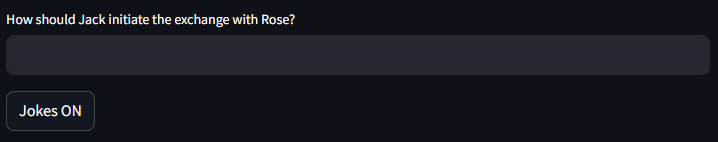

We will need to wait for the user to write some text in the textbox and to hit the "Jokes ON" button, after what, we can transfer the message to our `initiate_chat()` function. So, as soon as `hit_button` turns to True, meaning it was hit by the user, we are going to launch our agents.

We are also going to add a neat animation to make the user wait while our agents are preparing their answers. We'll use the `st.spinner()` function to display a spinning wheel while the chat is happening:

In [ ]:
if hit_button is True:

    with st.spinner("Preparing the jokes...."):
        
        chat_result = jack.initiate_chat(
            rose, 
            message=initial_msg, 
            max_turns=2
            )

This is how it will look like on our webpage:

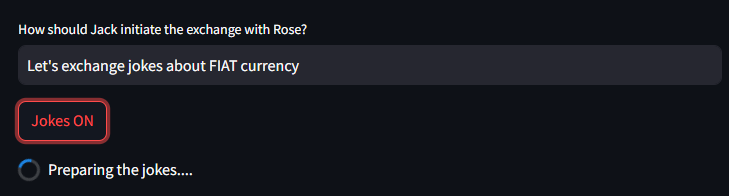

## Displaying the chat result

Now, once the chat has finished executing, we are going to display the result. To do that, we are going to go through each message of the chat history exchange between our agents and we are going to display its message. We are also going to display the name of each agent with a different color before each message.

Since Jack is the one who initiated the exchange, he will have the role `assistant` and Rose will have the role `user`. This denomination is not convenient but is currently a limitation of the OpenAI API.

In [ ]:
    for msg in chat_result.chat_history:
        st.markdown((":orange[jack]" if msg["role"] == "assistant" else ":red[rose]"))
        st.markdown(msg["content"] )

And this is how it will look like:

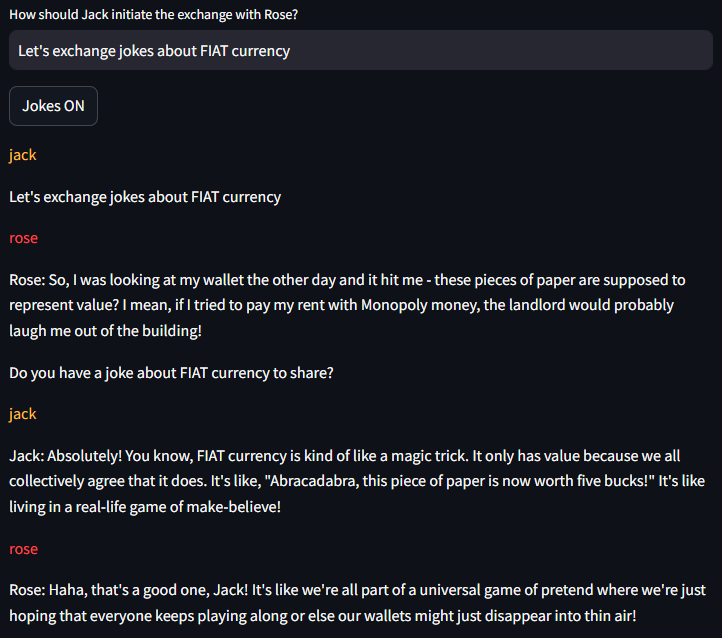

Looking pretty good!

## Running a streamlit app

Try to run the app yourself by running the script that comes with this notebook, you will have to use a slightly different command to do so, since this is now a streamlit app, we will have to run it using streamlit:

`streamlit run P02-S02-01-Streamlit_app.py`

The next step will be to build our Project app for this class, to turn it into a streamlit app and to then deploy it online!